In [ ]:
from simulation_funcs import gillespie_draw, gillespie_ssa, simple_propensity, simple_update
import bokeh
import tqdm
import numpy as np
import bokeh.plotting as bp
from bokeh.io import show, output_notebook
from bokeh.models import Span
import matplotlib.pyplot as plt 

size = 10 # amount of simulations per run
beta_vals = np.linspace(0, 15, 50) # beta values to test
average_damages = np.zeros((len(beta_vals), size))

for j, beta_mrna in enumerate(beta_vals):
    # Specify parameters for calculation
    beta_mrna =  beta_mrna # transcription rate
    gamma_mrna = 0.1 # degradation rate
    u = 1.0 # damage accumulation rate
    Pd = 0.5 # rate of damage detection. must be between 0 and 1
    gene_on = 0.8
    gene_off = 1 - gene_on

    args = (beta_mrna, gamma_mrna, u, Pd, gene_on, gene_off)
    time_points = np.linspace(0, 500, 1001)
    population_0 = np.array([0, 0, 0, 0], dtype=int) # starting with 0 population in everything and gene OFF

    # Seed random number generator for reproducibility
    np.random.seed(42)

    # Initialize output array
    samples = np.empty((size, len(time_points), 4), dtype=int) # again, change the number here to the amount of things we are tracking

    # shape of samples is (size, time_points, amount of species)
    # size = amount of times simulation is run
    # time_points = amount of time points in each simulation
    # amount of species = how many things we are tracking, mRNA, amount of damage on gene, etc.

    # Run the calculations
    for i in tqdm.tqdm_notebook(range(size)): # to print a progress bar
        # this is storing the population at each time point for each simulation being ran (i)
        samples[i,:,:] = gillespie_ssa(simple_propensity, simple_update,
                                    population_0, time_points, args=args)
        #average_damages.append(samples[i,:,2].mean(axis=1)) # getting 
    average_damages[j] = samples[:, :, 2].mean(axis=1) # getting the average damage over every simulation


C:\Users\joeot\AppData\Local\Temp\ipykernel_11212\1745399193.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(beta_vals), np.log(damages))


Text(0, 0.5, 'log D(t)')

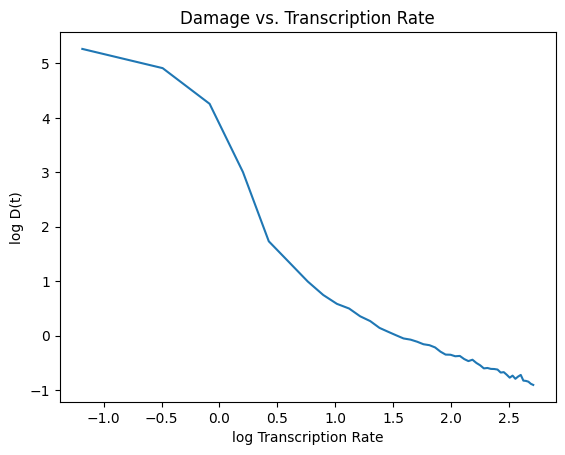

In [10]:
np.shape(average_damages)
damages = average_damages.mean(axis=1)
plt.plot(np.log(beta_vals), np.log(damages))
plt.title('Damage vs. Transcription Rate')
plt.xlabel('log Transcription Rate')
plt.ylabel('log D(t)')
#plt.ylabel('Average Damage over 1000 time units of 10 simulation')

C:\Users\joeot\AppData\Local\Temp\ipykernel_11212\2820782482.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(beta_u), np.log(damages_dm))


Text(0, 0.5, 'log D(t) / d_m')

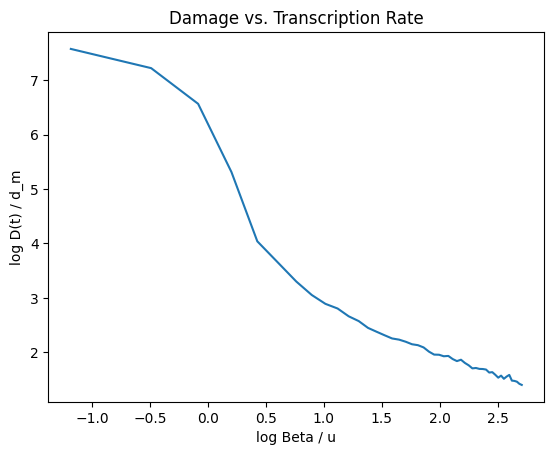

In [14]:
steady_d = np.log(1-u / beta_mrna) / np.log(1-Pd)

damages = average_damages.mean(axis=1)
damages_dm = damages / steady_d
beta_u = beta_vals / u
plt.plot(np.log(beta_u), np.log(damages_dm))
plt.title('Damage vs. Transcription Rate')
plt.xlabel('log Beta / u')
plt.ylabel('log D(t) / d_m')

In [6]:
from simulation_funcs import gillespie_draw, gillespie_ssa, simple_propensity, simple_update
import bokeh
import tqdm
import numpy as np
import bokeh.plotting as bp
from bokeh.io import show, output_notebook
from bokeh.models import Span
import matplotlib.pyplot as plt 

size = 10 # amount of simulations per run
Pd_vals = np.linspace(0, 1, 50) # beta values to test
average_damages = np.zeros((len(Pd_vals), size))

for j, Pd_val in enumerate(Pd_vals):
    # Specify parameters for calculation
    beta_mrna =  5.0 # transcription rate
    gamma_mrna = 0.1 # degradation rate
    u = 1.0 # damage accumulation rate
    Pd = Pd_val # rate of damage detection. must be between 0 and 1
    gene_on = 0.8
    gene_off = 1 - gene_on

    args = (beta_mrna, gamma_mrna, u, Pd, gene_on, gene_off)
    time_points = np.linspace(0, 500, 1001)
    population_0 = np.array([0, 0, 0, 0], dtype=int) # starting with 0 population in everything and gene OFF

    # Seed random number generator for reproducibility
    np.random.seed(42)

    # Initialize output array
    samples = np.empty((size, len(time_points), 4), dtype=int) # again, change the number here to the amount of things we are tracking

    # shape of samples is (size, time_points, amount of species)
    # size = amount of times simulation is run
    # time_points = amount of time points in each simulation
    # amount of species = how many things we are tracking, mRNA, amount of damage on gene, etc.

    # Run the calculations
    for i in tqdm.tqdm_notebook(range(size)): # to print a progress bar
        # this is storing the population at each time point for each simulation being ran (i)
        samples[i,:,:] = gillespie_ssa(simple_propensity, simple_update,
                                    population_0, time_points, args=args)
        #average_damages.append(samples[i,:,2].mean(axis=1)) # getting 
    average_damages[j] = samples[:, :, 2].mean(axis=1) # getting the average damage over every simulation


C:\Users\joeot\AppData\Local\Temp\ipykernel_11212\2957572328.py:39: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(size)): # to print a progress bar


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

# Repair Rate vs. Number of Damage Sites

C:\Users\joeot\AppData\Local\Temp\ipykernel_11212\3263724320.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(Pd_vals), np.log(damages))


Text(0, 0.5, 'Average Damage over 1000 time units of 10 simulations')

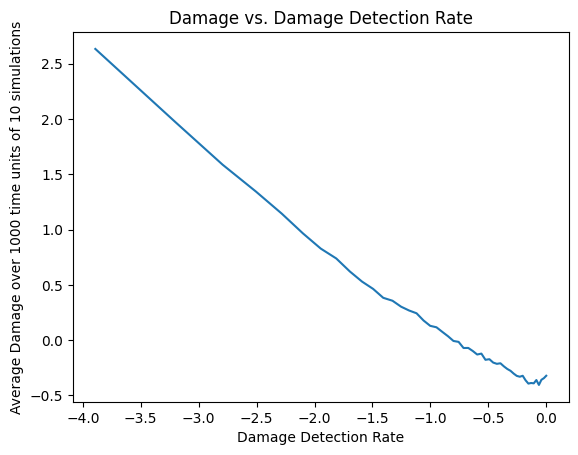

In [7]:
np.shape(average_damages)
damages = average_damages.mean(axis=1)
plt.plot(np.log(Pd_vals), np.log(damages))
plt.title('Damage vs. Damage Detection Rate')
plt.xlabel('Damage Detection Rate')
plt.ylabel('Average Damage over 1000 time units of 10 simulations')

# Expected Drift

I'm not too sure about this but it seems you can get the average expected value of what the system will do, whether damage accumulate or not by doing 
$$ \frac{d}{dt} E[D(t+dt) - D(t)] = u - \beta_m(1-(1-P_d)^d) $$
Basically just saying whats the expected difference of the damage population after a single time unit, so this is just going to be the rate of adding damage minus the rate of removing damage, but this has to be calculated at different parameter combinations of the model, and at different damage amounts, due to the repair rate relying on this damage parameter.

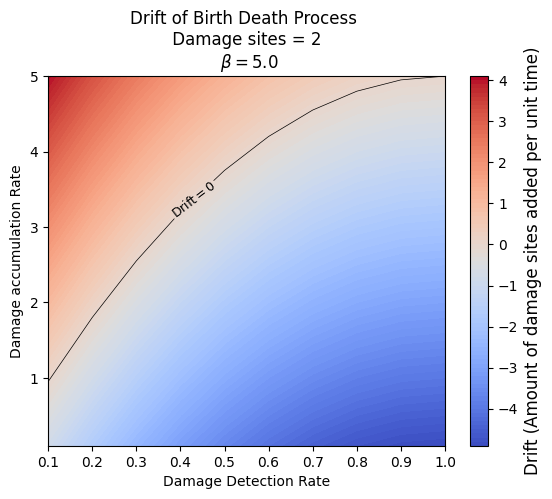

In [55]:
# contour plots for different amounts of damages I guess?
# I am going to fix Beta_m and d but change u and P_d

beta_m = 5.0
D = 2

u_s = np.linspace(0.1, 5.0, 10)
Pd_s = np.linspace(0.1, 1.0, 10)

uu, Pd_Pd = np.meshgrid(u_s, Pd_s)
z = uu - beta_m*(1-(1-Pd_Pd)**D) # Drift

plt.contourf(Pd_Pd, uu, z, cmap='coolwarm', levels=1000)
plt.title(f'Drift of Birth Death Process \n Damage sites = {D} \n $\\beta = {beta_m}$')
plt.xlabel('Damage Detection Rate')
plt.ylabel('Damage accumulation Rate')

contour = plt.contourf(Pd_Pd, uu, z, levels=100, cmap='coolwarm')

drift0 = plt.contour(Pd_Pd, uu, z, levels=[0], colors='black', linewidths=0.5)


plt.clabel(drift0, fmt="Drift$=0$", inline=True, fontsize=9)
cbar = plt.colorbar(contour)
cbar.set_label('Drift (Amount of damage sites added per unit time)', fontsize=12)


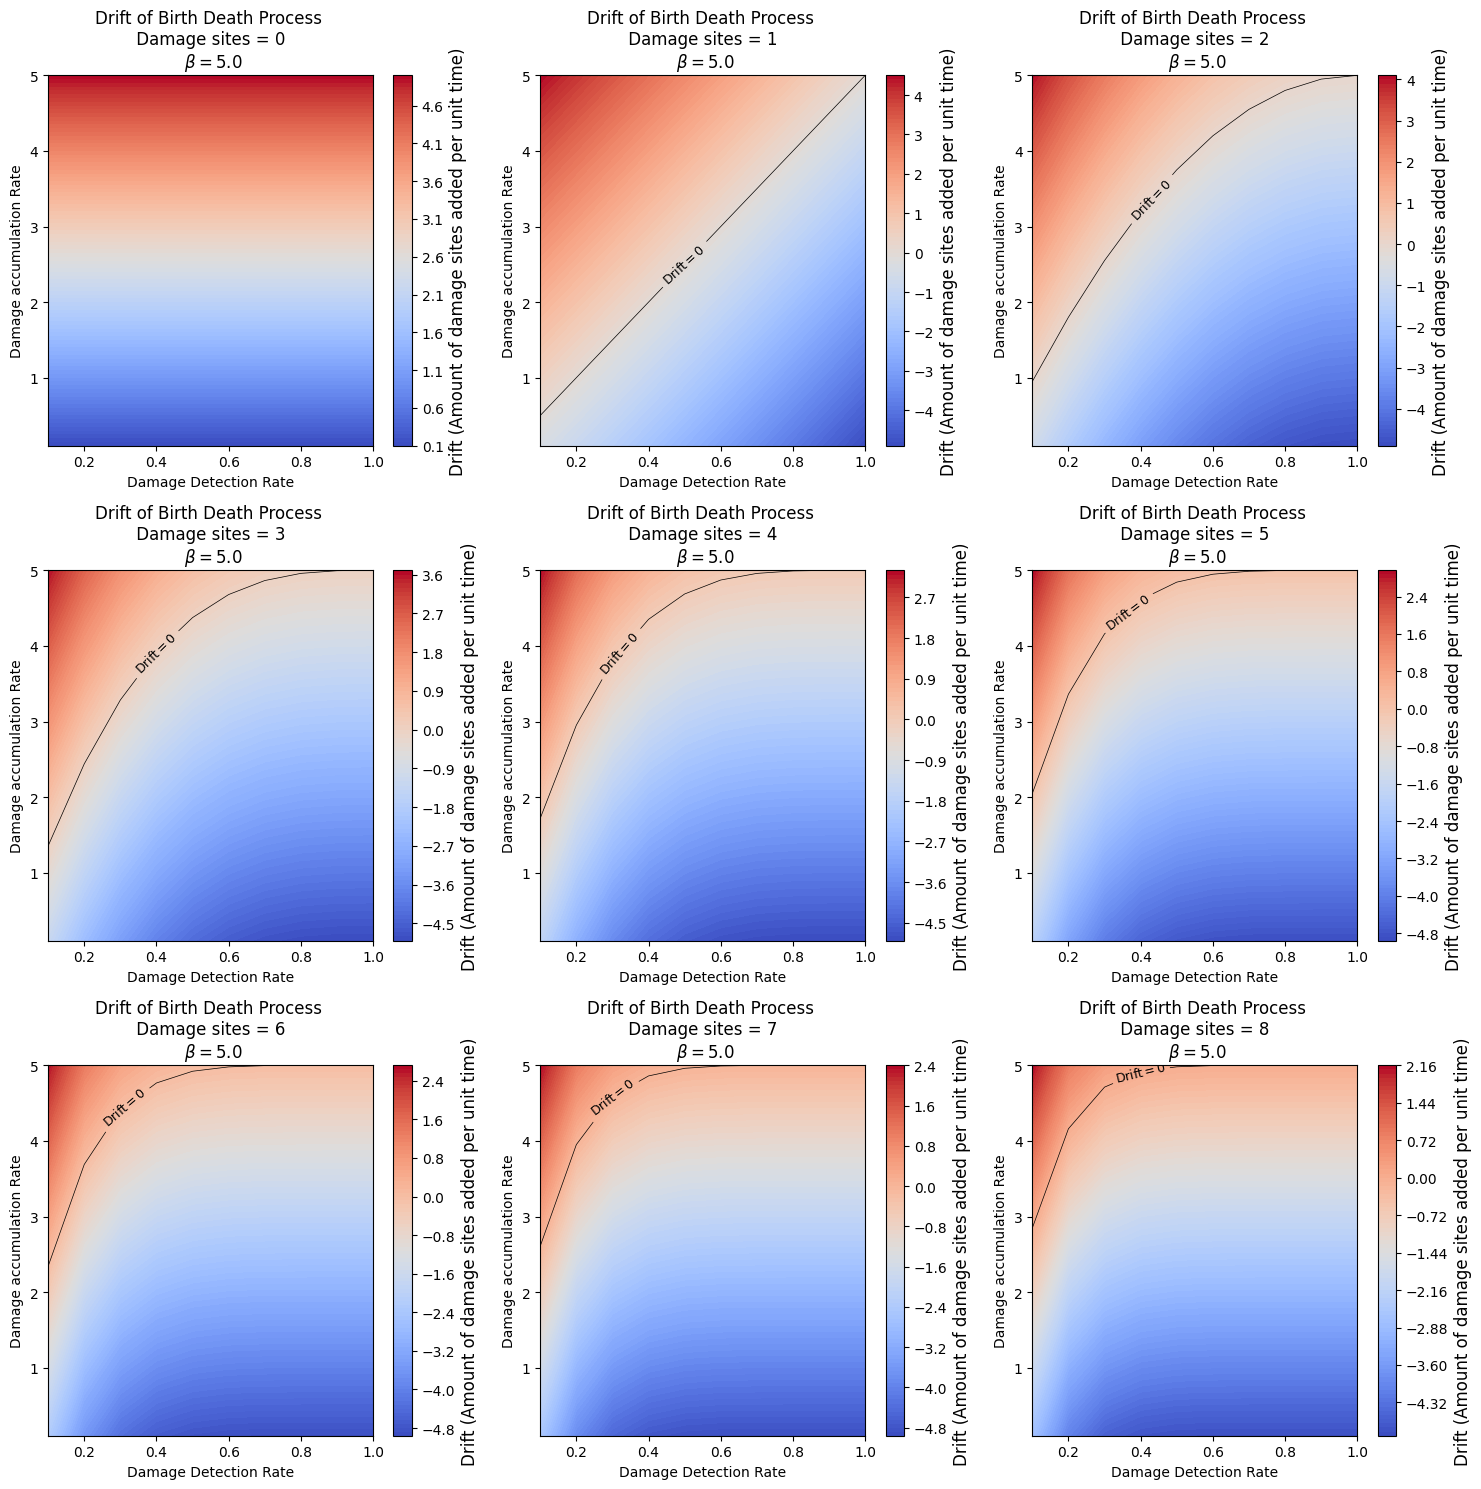

In [60]:
# contour plots for different amounts of damages I guess?
# I am going to fix Beta_m and d but change u and P_d

beta_m = 5.0
Ds = range(9)

u_s = np.linspace(0.1, 5.0, 10)
Pd_s = np.linspace(0.1, 1.0, 10)

uu, Pd_Pd = np.meshgrid(u_s, Pd_s)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
axes = axes.flatten()

for i, D in enumerate(Ds):
    z = uu - beta_m*(1-(1-Pd_Pd)**D) # Drift

    axes[i].contourf(Pd_Pd, uu, z, cmap='coolwarm', levels=1000)
    axes[i].set_title(f'Drift of Birth Death Process \n Damage sites = {D} \n $\\beta = {beta_m}$')
    axes[i].set_xlabel('Damage Detection Rate')
    axes[i].set_ylabel('Damage accumulation Rate')

    contour = axes[i].contourf(Pd_Pd, uu, z, levels=100, cmap='coolwarm')

    drift0 = axes[i].contour(Pd_Pd, uu, z, levels=[0], colors='black', linewidths=0.5)


    axes[i].clabel(drift0, fmt="Drift$=0$", inline=True, fontsize=9)
    cbar = plt.colorbar(contour)
    cbar.set_label('Drift (Amount of damage sites added per unit time)', fontsize=12)
plt.tight_layout()

Basically saying if you have the model parameters set to the x and y values of these axis, the graph tells you what the system is expected to do over time.

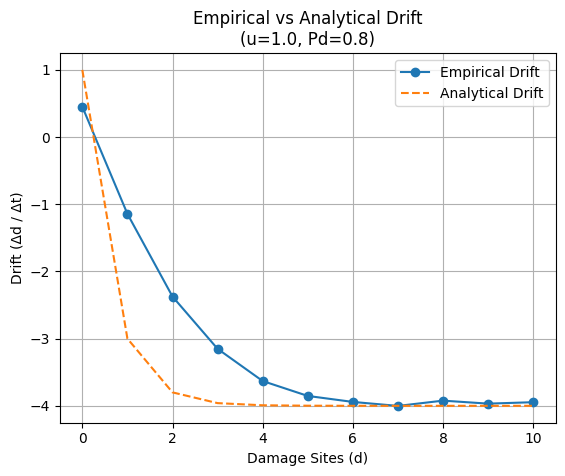

In [11]:
# To validate the plots above, this was written by ChatGPT, I had no idea how to validate something like this

beta_m = 5.0
gamma_m = 0.1
gene_on = 10.0
gene_off = 0.1
P_d = 0.8
u = 1.0
reps = 10000
dt = 0.5
max_d = 10

empirical_drifts = []
analytical_drifts = []

for d_init in range(max_d + 1):
    changes = []

    for _ in range(reps):
        pop0 = np.array([0, 0, d_init, 1]) 
        tspan = np.array([0.0, dt])
        samples = gillespie_ssa(simple_propensity, simple_update, pop0, tspan,
                            args=(beta_m, gamma_m, u, P_d, gene_on, gene_off))
        
        delta_d = samples[-1, 2] - d_init
        changes.append(delta_d)
    
    drift_estimate = np.mean(changes) / dt
    empirical_drifts.append(drift_estimate)

    analytical = u - beta_m * (1 - (1 - P_d)**d_init)
    analytical_drifts.append(analytical)

# Plotting
plt.plot(range(max_d + 1), empirical_drifts, label='Empirical Drift', marker='o')
plt.plot(range(max_d + 1), analytical_drifts, label='Analytical Drift', linestyle='--')
plt.xlabel('Damage Sites (d)')
plt.ylabel('Drift (Δd / Δt)')
plt.title(f'Empirical vs Analytical Drift\n(u={u}, Pd={P_d})')
plt.legend()
plt.grid(True)
plt.show()


# Link back with classic birth death models

$ (1-P_d)^d \approx 1-d*P_d $ this will be true only in the case of small d, so could keep damage detection high/restrict d to a low value to try and show that when this is the case, we get a classic birth death model.